#### EECS 16A Discussion 14B

# Problem 1: Polynomial Fitting

In this discussion, we are trying to fit data (observations) of the form $\{(x_i,y_i),i=1,2,...,n\}$ to a polynomial that we know looks like this:

$$y = f(x) = a_0 + a_1x + a_2x^2 + a_3x^3 + a_4x^4$$

In other words, we want to find $a_0$, $a_1$, $a_2$, $a_3$, and $a_4$ that best fit the data.

More generally, we might want to fit the data to a polynomial of different degree (for instance, if we do not know that the polynomial looks like as above), so we could try to solve for some $a_0,a_1,\ldots,a_d$ that define a $d$-degree polynomial.

Note that the observations are not perfect -- they are *noisy*, which means that $y_i \neq f(x_i)$ in general! That is what makes this problem interesting.

This first block of code contains functions that will help us set up some useful objects -- the polynomial curve for a set of parameters $a_0$, $a_1$, $a_2$, $a_3$, and $a_4$ and a "data" matrix that we will use to compute the least squares estimate later.

### Initialization

In [2]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import pi, cos, exp

%matplotlib inline

### Construct Data Matrix
Use this block to make the data matrix. The input data is given in the array `x_data`, and the output data is given in the array `y_data`.

To construct the data matrix, which we call `DataMat`, you only need to specify what degree polynomial you will use to fit the data.

If `x_data` has the form `x_{data}`$ =\begin{bmatrix}x_1\\x_2\\ \vdots \\x_n \end{bmatrix}$, then `DataMat` has the form `DataMat` $=\begin{bmatrix}1 &x_1&x_1^2& \cdots &x_1^d\\1 &x_2&x_2^2& \cdots &x_2^d\\ \vdots & \vdots & \vdots & \ddots & \vdots \\1 &x_n&x_n^2& \cdots &x_n^d \end{bmatrix}$, where $d$ is the degree of the polynomial. 

### Function that defines a data matrix for some input data

In [3]:
"""You'll understand why it's constructed like this after
doing the worksheet!"""
def data_matrix(input_data,degree): 
    # degree is the degree of the polynomial you plan to fit the data with    
    Data=np.zeros((len(input_data),degree+1))
    
    for k in range(0,degree+1):
        Data[:,k]=(list(map(lambda x:x**k ,input_data)))
                  
    return Data


### Function that helps with plotting 

In [4]:
"""Function that defines the polynomial curve for a set of parameters and a range. The set of parameters defines the degree of the
polynomial."""
def poly_curve(params,x_input):
    # params contains the coefficients that multiply the polynomial terms, in degree of lowest degree to highest degree
    degree=len(params)-1
    x_range=[np.min(x_input), np.max(x_input)]
    x=np.linspace(x_range[0],x_range[1],1000)
    y=x*0
    
    for k in range(0,degree+1):
        coeff=params[k]
        y=y+list(map(lambda z:coeff*z**k,x))        
    return x,y


### Printing the data matrix

In [5]:
x_data = [0.0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
y_data = [24.0, 6.61, 0, -0.95, 0.07, 0.73, -0.12, -0.83, -0.04, 6.42]

D = data_matrix(x_data, 4)
print(D)


[[1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
 [1.000000e+00 5.000000e-01 2.500000e-01 1.250000e-01 6.250000e-02]
 [1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00]
 [1.000000e+00 1.500000e+00 2.250000e+00 3.375000e+00 5.062500e+00]
 [1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01]
 [1.000000e+00 2.500000e+00 6.250000e+00 1.562500e+01 3.906250e+01]
 [1.000000e+00 3.000000e+00 9.000000e+00 2.700000e+01 8.100000e+01]
 [1.000000e+00 3.500000e+00 1.225000e+01 4.287500e+01 1.500625e+02]
 [1.000000e+00 4.000000e+00 1.600000e+01 6.400000e+01 2.560000e+02]
 [1.000000e+00 4.500000e+00 2.025000e+01 9.112500e+01 4.100625e+02]]


### Least Squares
Recall the system of equations we are trying to solve here:

$$\texttt{D}\vec{a} = \vec{y},$$ where $\vec{a} = \begin{bmatrix}a_0\\a_1\\:\\a_d\end{bmatrix}$ and $\vec{y} = \begin{bmatrix}y_1\\y_2\\ : \\y_n \end{bmatrix}$.

In the next block, you will implement code to compute $\vec{a}$, the set of optimal polynomial coefficients (optimal in a least squares sense) to fit the data. Put the coefficients in an array called params.

### Finding the least squares solution

In [6]:
# params = np.linalg.solve(np.dot(np.transpose(D), D), np.dot(np.transpose(D), y_data))
params = np.linalg.inv(np.transpose(D) @ D) @ np.transpose(D) @ y_data
print(params)

[ 24.00958042 -49.99515152  35.0039627   -9.99561772   0.99841492]


### Plot Curve Fit
Use the next block to compare your fitted polynomial to the data. All you need to do is enter the polynomial coefficients (in degree of lowest degree to highest degree) into an array called params. 

### Plotting the fitted polynomial and the original datapoints

Text(0.5, 1.0, 'Polynomial of Degree 4')

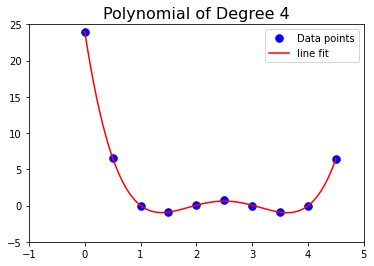

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111,xlim=[-1,5],ylim=[-5,25])
x,y=poly_curve(params,x_data)  ###### Plotting the fitted data

ax.plot(x_data,y_data,'.b',markersize=15)   ###### Plotting the original data
ax.plot(x,y,'r') 
ax.legend(['Data points','line fit'])
plt.title('Polynomial of Degree %d' %(len(params)-1),fontsize=16)

Additionally, it is helpful to see what the error of the our polynomial fit is. Run the error function in the cell below to analyze how close the polynomial is to the true values.


In [25]:
def error(params, x_data, y_data):
    return np.sum((y_data - numpy.polyval(params[::-1], x_data))**2)
    
error(params, x_data, y_data)

0.05312027972027798

### Exploring other polynomials
What if we didn't know what the degree of the polynomial was? What if instead we decided that our polynomial had degree 1, 2 or even 20? Change the degree variable to see how different degree polynomials fit the data. Try degrees of 1, 4, 8, 15, 20 to get started. You can also look at how the error changes as we change the degree

Text(0.5, 1.0, 'Polynomial of Degree 4')

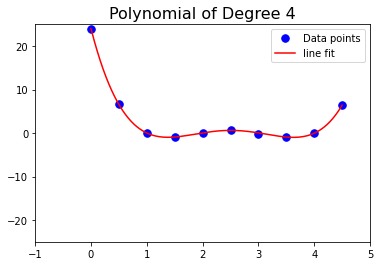

In [37]:
degree = 4 # use this to change the degree of your polynomial
D = data_matrix(x_data, degree)
params = np.linalg.lstsq(D, y_data, rcond=None)[0]
#plotting the figure
fig=plt.figure()
ax=fig.add_subplot(111,xlim=[-1,5],ylim=[-25,25])
x,y=poly_curve(params, x_data)  ###### Plotting the fitted data

ax.plot(x_data,y_data,'.b',markersize=15)   ###### Plotting the original data
ax.plot(x,y,'r') 
ax.legend(['Data points','line fit'])
plt.title('Polynomial of Degree %d' %(len(params)-1),fontsize=16)

In [38]:
error(params, x_data, y_data)

0.05312027972027535

### Manipulating Data Points.
What happens if we remove data points or the noise of our data is larger? Run the cells below to look at what happens if we remove data points or made our observations a lot noisier. You can change how many data points to drop or how much noise you want. Additionally, see how noise and dropping data points interacts with the degree of the polynomial and the error it produces.

In [59]:
"""NOTE: We only have 10 data points, so choosing num_points greater than 10 or less than  will break this function!!!"""
def reduce_points(x_data, y_data, num_points=0):
    x = np.array(x_data)
    y =np.array(y_data)
    indexes = np.random.choice(len(x_data), size= num_points, replace=False)
    return x[indexes], y[indexes] 

In [94]:
"NOTE: try ranges of 0.01 to 10 to see the differences"""
def noisy_points(y_data, noise_factor = 1):
    return np.array(y_data) + noise_factor * np.random.randn(len(y_data))

0.05312027972027508


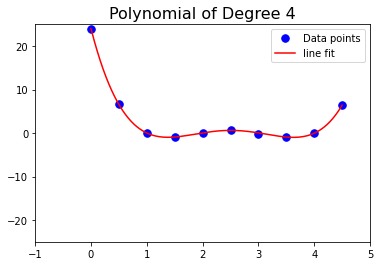

In [109]:
"""Removing points"""
num_points = 10 ### number of points to keep, set it to 10 if you want to keep all points
new_x, new_y = reduce_points(x_data, y_data, num_points)
new_y = noisy_points(new_y, 0) ### how much extra noise do you want, set it to 0 if you do not want any noise
degree = 4 # use this to change the degree of your polynomial
D = data_matrix(new_x, degree)
params = np.linalg.lstsq(D, new_y, rcond=None)[0]
#plotting the figure
fig=plt.figure()
ax=fig.add_subplot(111,xlim=[-1,5],ylim=[-25,25])
x,y=poly_curve(params, new_x)  ###### Plotting the fitted data

ax.plot(new_x,new_y,'.b',markersize=15)   ###### Plotting the new data
ax.plot(x,y,'r') 
ax.legend(['Data points','line fit'])
plt.title('Polynomial of Degree %d' %(len(params)-1),fontsize=16)
print(error(params, new_x, new_y))